# Introduction to Tensorflow and Keras

TensorFlow [[Cite:GoogleTensorFlow]](https://research.google/pubs/pub45381/) is an open-source software library for machine learning in various kinds of perceptual and language understanding tasks. It is currently used for research and production by different teams in many commercial Google products, such as speech recognition, Gmail, Google Photos, and search, many of which had previously used its predecessor DistBelief. TensorFlow was originally developed by the Google Brain team for Google's research and production purposes and later released under the Apache 2.0 open source license on November 9, 2015.

* [TensorFlow Homepage](https://www.tensorflow.org/)
* [TensorFlow GitHib](https://github.com/tensorflow/tensorflow)
* [TensorFlow Google Groups Support](https://groups.google.com/forum/#!forum/tensorflow)
* [TensorFlow Google Groups Developer Discussion](https://groups.google.com/a/tensorflow.org/forum/#!forum/discuss)
* [TensorFlow FAQ](https://www.tensorflow.org/resources/faq)

## Why TensorFlow

* Supported by Google
* Works well on Windows, Linux, and Mac
* Excellent GPU support
* Python is an easy to learn programming language
* Python is extremely popular in the data science community

## Deep Learning Tools
TensorFlow is not the only game in town. The biggest competitor to TensorFlow/Keras is PyTorch. Listed below are some of the deep learning toolkits actively being supported:

* **[TensorFlow](https://www.tensorflow.org/)** - Google's deep learning API.  The focus of this class, along with Keras.
* **[Keras](https://keras.io/)** - Acts as a higher-level to Tensorflow.
* **[PyTorch](https://pytorch.org/)** - PyTorch is an open-source machine learning library based on the Torch library, used for computer vision and natural language applications processing. Facebook's AI Research lab primarily develops PyTorch.

Other deep learning tools:

* **[Deeplearning4J](http://deeplearning4j.org/)** - Java-based. Supports all major platforms. GPU support in Java!
* **[H2O](http://www.h2o.ai/)** - Java-based.  

In my opinion, the two primary Python libraries for deep learning are PyTorch and Keras. Generally, PyTorch requires more lines of code to perform the deep learning applications presented in this course. This trait of PyTorch gives Keras an easier learning curve than PyTorch. However, if you are creating entirely new neural network structures in a research setting, PyTorch can make for easier access to some of the low-level internals of deep learning.


## Using TensorFlow Directly

Most of the time, we will communicate with TensorFlow using Keras [[Cite:franccois2017deep]](https://www.manning.com/books/deep-learning-with-python), which allows you to specify the number of hidden layers and create the neural network. TensorFlow is a low-level mathematics API, similar to [Numpy](http://www.numpy.org/). However, unlike Numpy, TensorFlow is built for deep learning. TensorFlow compiles these compute graphs into highly efficient C++/[CUDA](https://en.wikipedia.org/wiki/CUDA) code.




# TensorFlow playground

TensorFlow playground [link](https://https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.51923&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

# What is Tensor ?
In the realm of machine learning and deep learning, **a tensor is a multidimensional array or a generalization of matrices to higher dimensions.**

It's the fundamental data structure used to represent and process data within neural networks and other machine learning models

Multidimensional Array: Just as a matrix is a 2D array (rows and columns), a tensor can have any number of dimensions.
**0-D Tensor (Scalar):** A single number.
**1-D Tensor (Vector):** An array of numbers.
**2-D Tensor (Matrix):** A table of numbers.
**3-D Tensor and Beyond:** Represent data with more complex structures, like images (height, width, channels), videos (time, height, width, channels), or even higher-dimensional data.


# TensorFlow Graph computation

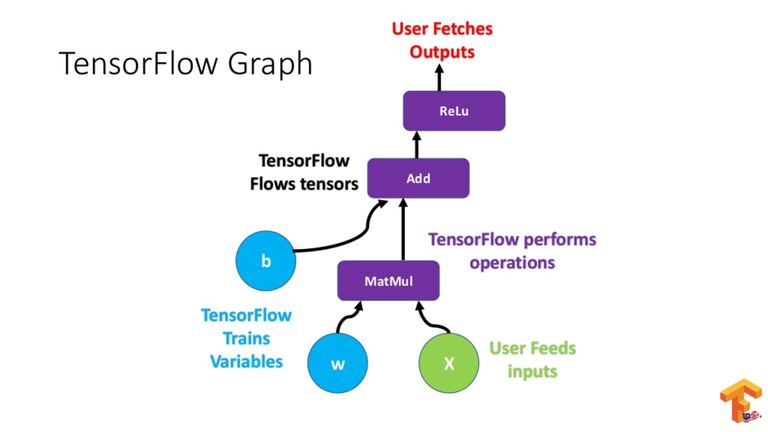

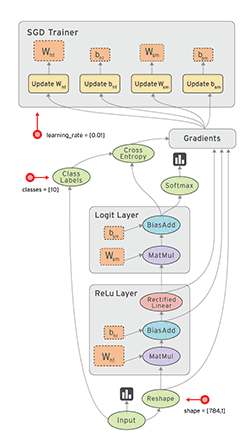

## TensorFlow Linear Algebra Examples

TensorFlow is a library for linear algebra. Keras is a higher-level abstraction for neural networks that you build upon TensorFlow. In this section, I will demonstrate some basic linear algebra that directly employs TensorFlow and does not use Keras. First, we will see how to multiply a row and column matrix.

In [ ]:
import tensorflow as tf

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

print(product)
print(float(product))

In [ ]:
import numpy as np
numpy_array = np.array([[1.0, 2.0], [3.0, 4.0]])
print(f"numpy_array: {numpy_array}")
tensor_from_numpy = tf.convert_to_tensor(numpy_array)
print(tensor_from_numpy)

This example multiplied two TensorFlow constant tensors.  Next, we will see how to subtract a constant from a variable.

In [ ]:
import tensorflow as tf

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# Add an op to subtract 'a' from 'x'.  Run it and print the result
sub = tf.subtract(x, a)
print(sub)
print(sub.numpy())
# ==> [-2. -1.]

Of course, variables are only useful if their values can be changed.  The program can accomplish this change in value by calling the assign function.

In [ ]:
x.assign([4.0, 6.0])

The program can now perform the subtraction with this new value.

In [ ]:
sub = tf.subtract(x, a)
print(sub)
print(sub.numpy())

In the next section, we will see a TensorFlow example that has nothing to do with neural networks.

In [ ]:
# Create a tensor of integers
integer_tensor = tf.constant([[1, 2, 3], [4, 5, 6]])

# Cast the tensor to float32
float_tensor = tf.cast(integer_tensor, tf.float32)

# Print the float tensor
tf.print("Float Tensor:", float_tensor)

# Get the shape of the tensor
shape = tf.shape(float_tensor)
tf.print("Shape:", shape)

# Get the rank (number of dimensions) of the tensor
rank = tf.rank(float_tensor)
tf.print("Rank:", rank)

## TensorFlow Mandelbrot Set Example

Next, we examine another example where we use TensorFlow directly. To demonstrate that TensorFlow is mathematical and does not only provide neural networks, we will also first use it for a non-machine learning rendering task. The code presented here can render a [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set).

In [ ]:
import tensorflow as tf
import numpy as np

import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def render(a):
  a_cyclic = (a*0.3).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  return PIL.Image.fromarray(a)

#@tf.function
def mandelbrot_helper(grid_c, current_values, counts,cycles):

  for i in range(cycles):
    temp = current_values*current_values + grid_c
    not_diverged = tf.abs(temp) < 4
    current_values.assign(temp),
    counts.assign_add(tf.cast(not_diverged, tf.float32))

def mandelbrot(render_size,center,zoom,cycles):
  f = zoom/render_size[0]
  real_start = center[0]-(render_size[0]/2)*f
  real_end = real_start + render_size[0]*f
  imag_start = center[1]-(render_size[1]/2)*f
  imag_end = imag_start + render_size[1]*f

  real_range = tf.range(real_start,real_end,f,dtype=tf.float64)
  imag_range = tf.range(imag_start,imag_end,f,dtype=tf.float64)
  real, imag = tf.meshgrid(real_range,imag_range)
  grid_c = tf.constant(tf.complex(real, imag))
  current_values = tf.Variable(grid_c)
  counts = tf.Variable(tf.zeros_like(grid_c, tf.float32))

  mandelbrot_helper(grid_c, current_values,counts,cycles)
  return counts.numpy()

With the above code defined, we can now calculate and render a Mandlebrot plot.

In [ ]:
counts = mandelbrot(
    #render_size=(3840,2160), # 4K
    #render_size=(1920,1080), # HD
    render_size=(640,480),
    center=(-0.5,0),
    zoom=9,
    cycles=200
)
img = render(counts)
print(img.size)
img

#img.save("test.png")

Mandlebrot rendering programs are both simple and infinitely complex at the same time. This view shows the entire Mandlebrot universe simultaneously, as a view completely zoomed out. However, if you zoom in on any non-black portion of the plot, you will find infinite hidden complexity.

## Introduction to Keras

[Keras](https://keras.io/) is a layer on top of Tensorflow that makes it much easier to create neural networks. Rather than define the graphs, as you see above, you set the individual layers of the network with a much more high-level API. Unless you are researching entirely new structures of deep neural networks, it is unlikely that you need to program TensorFlow directly.  

**For this class, we will usually use TensorFlow through Keras, rather than direct TensorFlow**

## Simple TensorFlow Regression: MPG

This example shows how to encode the MPG dataset for regression and predict values. We will see if we can predict the miles per gallon (MPG) for a car based on the car's weight, cylinders, engine size, and other features.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics


df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv",
    na_values=['NA', '?'])


To inspect the DataFrame, we use the following methods:

**head():** This method displays the first few rows of the DataFrame. By default, it shows the first five rows, but you can specify the number of rows to display as an argument.

**tail():** This method displays the last few rows of the DataFrame. By default, it shows the last five rows, but you can specify the number of rows to display as an argument.

**info():** This method provides information about the DataFrame, including the number of rows and columns, the data types of each column, and memory usage.

**describe():** This method generates summary statistics of the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartiles for numeric columns.

In [ ]:
df.info()

**Engine displacement** is the combined volume swept by all the pistons inside the cylinders of an engine. It's a measure of the engine's size and is typically expressed in cubic centimeters (cc) or liters (L). Generally, a larger displacement indicates a more powerful engine, but it can also lead to higher fuel consumption.

In the context of your machine learning model, the displacement feature likely serves as an input variable to predict the mpg (miles per gallon) of a car. The model will learn the relationship between engine displacement and fuel efficiency, along with other features like cylinders, horsepower, and weight.

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
# Scatter plot for 'mpg' vs. other features
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(df['cylinders'], df['mpg'])
plt.xlabel('Cylinders')
plt.ylabel('MPG')

plt.subplot(2, 3, 2)
plt.scatter(df['displacement'], df['mpg'])
plt.xlabel('Displacement')
plt.ylabel('MPG')

plt.subplot(2, 3, 3)
plt.scatter(df['horsepower'], df['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('MPG')

plt.subplot(2, 3, 4)
plt.scatter(df['weight'], df['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')

plt.subplot(2, 3, 5)
plt.scatter(df['acceleration'], df['mpg'])
plt.xlabel('Acceleration')
plt.ylabel('MPG')

plt.tight_layout()
plt.show()

# Histogram for 'mpg'
plt.figure()
plt.hist(df['mpg'], bins=10)
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()

In [ ]:


cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression
print(f"x.shape: {x.shape}")
print(f"y.shape: {y.shape}")
# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(15, activation='relu')) # Hidden 2
model.add(Dense(5, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.summary()




In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x,y,verbose=1,epochs=100)

# Batch Size
batch_size in model.fit: The batch_size argument in model.fit tells Keras how many samples to process before updating the model's weights.

**Common Batch Sizes:**

32 is a very common starting point.
Powers of 2 (like 16, 64, 128) are often used due to potential hardware optimizations.
You might need to experiment to find the best value for your specific problem.
Impact of Batch Size:

**Smaller batch size:**
More frequent weight updates, which can lead to faster learning but also more noise in the training process.
Can help prevent overfitting, especially with smaller datasets.
May require more memory as the entire dataset might not fit into memory at once.

**Larger batch size:**
Less frequent weight updates, which can lead to smoother training but potentially slower convergence.
Can be more computationally efficient, especially with large datasets and hardware like GPUs.
Might lead to overfitting if the dataset is small.
Additional Considerations

**Compile the model:** Make sure you model.compile before calling model.fit.  This step configures the loss function, optimizer, and any metrics you want to track during training.

Experiment with batch size: The optimal batch size can depend on your dataset size, model complexity, and hardware. Don't hesitate to try different values and see how they affect training time and model performance.

In [ ]:
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv",
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression
print(f"x.shape: {x.shape}")
print(f"y.shape: {y.shape}")
# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(15, activation='relu')) # Hidden 2
model.add(Dense(5, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.summary()

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model with batch size
batch_size = 32  # Choose a suitable batch size (experiment!)
history = model.fit(x, y, epochs=100, batch_size=batch_size, validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Build the neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(10, activation='relu')) # Hidden 3
model.add(Dense(10, activation='relu')) # Hidden 3
model.add(Dense(10, activation='relu')) # Hidden 3
model.add(Dense(10, activation='relu')) # Hidden 3
model.add(Dense(10, activation='relu')) # Hidden 3
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=1,epochs=100)

## Introduction to Neural Network Hyperparameters

If you look at the above code, you will see that the neural network contains four layers. The first layer is the input layer because it contains the **input_dim** parameter that the programmer sets to be the number of inputs the dataset has. The network needs one input neuron for every column in the data set (including dummy variables).  

There are also several hidden layers, with 25 and 10 neurons each. You might be wondering how the programmer chose these numbers. Selecting a hidden neuron structure is one of the most common questions about neural networks. Unfortunately, there is no right answer. These are hyperparameters. They are settings that can affect neural network performance, yet there are no clearly defined means of setting them.

In general, more hidden neurons mean more capability to fit complex problems. However, too many neurons can lead to overfitting and lengthy training times. Too few can lead to underfitting the problem and will sacrifice accuracy. Also, how many layers you have is another hyperparameter. In general, more layers allow the neural network to perform more of its feature engineering and data preprocessing. But this also comes at the expense of training times and the risk of overfitting. In general, you will see that neuron counts start larger near the input layer and tend to shrink towards the output layer in a triangular fashion.


## Controlling the Amount of Output

The program produces one line of output for each training epoch. You can eliminate this output by setting the verbose setting of the fit command:

* **verbose=0** - No progress output (use with Jupyter if you do not want output).
* **verbose=1** - Display progress bar, does not work well with Jupyter.
* **verbose=2** - Summary progress output (use with Jupyter if you want to know the loss at each epoch).

## Regression Prediction

Next, we will perform actual predictions. The program assigns these predictions to the **pred** variable. These are all MPG predictions from the neural network. Notice that this is a 2D array? You can always see the dimensions of what Keras returns by printing out **pred.shape**. Neural networks can return multiple values, so the result is always an array. Here the neural network only returns one value per prediction (there are 398 cars, so 398 predictions). However, a 2D range is needed because the neural network has the potential of returning more than one value.   

In [ ]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

We would like to see how good these predictions are.  We know the correct MPG for each car so we can measure how close the neural network was.

In [ ]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Final score (RMSE): {score}")

The number printed above is the average number of predictions above or below the expected output. We can also print out the first ten cars with predictions and actual MPG.

In [ ]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Car name: {cars[i]}, MPG: {y[i]}, "
          + f"predicted MPG: {pred[i]}")

## Simple TensorFlow Classification: Iris

Classification is how a neural network attempts to classify the input into one or more classes.  The simplest way of evaluating a classification network is to track the percentage of training set items classified incorrectly.  We typically score human results in this manner.  For example, you might have taken multiple-choice exams in school in which you had to shade in a bubble for choices A, B, C, or D.  If you chose the wrong letter on a 10-question exam, you would earn a 90%.  In the same way, we can grade computers; however, most classification algorithms do not merely choose A, B, C, or D.  Computers typically report a classification as their percent confidence in each class.  

As you can see, the human test taker marked the first question as "B." However, the computer test taker had an 80% (0.8) confidence in "B" and was also somewhat sure with 10% (0.1) on "A." The computer then distributed the remaining points to the other two.  In the simplest sense, the machine would get 80% of the score for this question if the correct answer were "B." The computer would get only 5% (0.05) of the points if the correct answer were "D."

We previously saw how to train a neural network to predict the MPG of a car. Based on four measurements, we will now see how to predict a class, such as the type of iris flower. The code to classify iris flowers is similar to MPG; however, there are several important differences:

* The output neuron count matches the number of classes (in the case of Iris, 3).
* The Softmax transfer function is utilized by the output layer.* The loss function is cross entropy.

In [ ]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv",
    na_values=['NA', '?'])

# Convert to numpy - Classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species']) # Classification
species = dummies.columns
y = dummies.values


# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1], activation='softmax')) # Output

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

In [ ]:
# Print out number of species found:

print(species)

Now that you have a neural network trained, we would like to be able to use it. The following code makes use of our neural network. Exactly like before, we will generate predictions. Notice that three values come back for each of the 150 iris flowers. There were three types of iris (Iris-setosa, Iris-versicolor, and Iris-virginica).  

In [ ]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

If you would like to turn of scientific notation, the following line can be used:

In [ ]:
np.set_printoptions(suppress=True)

Now we see these values rounded up.

In [ ]:
print(y[0:10])

Usually, the program considers the column with the highest prediction to be the prediction of the neural network.  It is easy to convert the predictions to the expected iris species.  The argmax function finds the index of the maximum prediction for each row.

In [ ]:
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {expected_classes}")

Of course, it is straightforward to turn these indexes back into iris species. We use the species list that we created earlier.

In [ ]:
print(species[predict_classes[1:10]])

Accuracy might be a more easily understood error metric.  It is essentially a test score.  For all of the iris predictions, what percent were correct?  The downside is it does not consider how confident the neural network was in each prediction.

In [ ]:
from sklearn.metrics import accuracy_score

correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

The code below performs two ad hoc predictions.  The first prediction is a single iris flower, and the second predicts two iris flowers.  Notice that the **argmax** in the second prediction requires **axis=1**?  Since we have a 2D array now, we must specify which axis to take the **argmax** over.  The value **axis=1** specifies we want the max column index for each row.

In [ ]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred)
print(f"Predict that {sample_flower} is: {species[pred]}")

You can also predict two sample flowers.

In [ ]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]],\
        dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred,axis=1)
print(f"Predict that these two flowers {sample_flower} ")
print(f"are: {species[pred]}")

# Saving and Loading a Keras Neural Network

Complex neural networks will take a long time to fit/train.  It is helpful to be able to save these neural networks so that you can reload them later.  A reloaded neural network will not require retraining.  Keras provides three formats for neural network saving.

* **JSON** - Stores the neural network structure (no weights) in the [JSON file format](https://en.wikipedia.org/wiki/JSON).
* **HDF5** - Stores the complete neural network (with weights) in the [HDF5 file format](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). Do not confuse HDF5 with [HDFS](https://en.wikipedia.org/wiki/Apache_Hadoop).  They are different.  We do not use HDFS in this class.

Usually, you will want to save in HDF5.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

save_path = "."

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv",
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

# Predict
pred = model.predict(x)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Before save score (RMSE): {score}")

# save neural network structure to JSON (no weights)
model_json = model.to_json()
with open(os.path.join(save_path,"network.json"), "w") as json_file:
    json_file.write(model_json)

# save entire network to HDF5 (save everything, suggested)
model.save(os.path.join(save_path,"network.h5"))

The code below sets up a neural network and reads the data (for predictions), but it does not clear the model directory or fit the neural network. The code loads the weights from the previous fit. Now we reload the network and perform another prediction. The RMSE should match the previous one exactly if we saved and reloaded the neural network correctly.

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model(os.path.join(save_path,"network.h5"))
pred = model2.predict(x)
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"After load score (RMSE): {score}")

# Early Stopping in Keras to Prevent Overfitting

It can be difficult to determine how many epochs to cycle through to train a neural network. Overfitting will occur if you train the neural network for too many epochs, and the neural network will not perform well on new data, despite attaining a good accuracy on the training set. Overfitting occurs when a neural network is trained to the point that it begins to memorize rather than generalize, as demonstrated in Figure 3.OVER.

**Figure 3.OVER: Training vs. Validation Error for Overfitting**
![Training vs. Validation Error for Overfitting](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_3_training_val.png "Training vs. Validation Error for Overfitting")

It is important to segment the original dataset into several datasets:

* **Training Set**
* **Validation Set**
* **Holdout Set**

You can construct these sets in several different ways. The following programs demonstrate some of these.

The first method is a training and validation set. We use the training data to train the neural network until the validation set no longer improves. This attempts to stop at a near-optimal training point. This method will only give accurate "out of sample" predictions for the validation set; this is usually 20% of the data. The predictions for the training data will be overly optimistic, as these were the data that we used to train the neural network. Figure 3.VAL demonstrates how we divide the dataset.

**Figure 3.VAL: Training with a Validation Set**
![Training with a Validation Set](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_1_train_val.png "Training with a Validation Set")

## Early Stopping with Classification

We will now see an example of classification training with early stopping. We will train the neural network until the error no longer improves on the validation set.

In [ ]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv",
    na_values=['NA', '?'])

# Convert to numpy - Classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species']) # Classification
species = dummies.columns
y = dummies.values

# Split into validation and training sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,
        verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
        callbacks=[monitor],verbose=2,epochs=1000)


There are a number of parameters that are specified to the **EarlyStopping** object.

* **min_delta** This value should be kept small. It simply means the minimum change in error to be registered as an improvement.  Setting it even smaller will not likely have a great deal of impact.
* **patience** How long should the training wait for the validation error to improve?  
* **verbose** How much progress information do you want?
* **mode** In general, always set this to "auto".  This allows you to specify if the error should be minimized or maximized.  Consider accuracy, where higher numbers are desired vs log-loss/RMSE where lower numbers are desired.
* **restore_best_weights** This should always be set to true.  This restores the weights to the values they were at when the validation set is the highest.  Unless you are manually tracking the weights yourself (we do not use this technique in this course), you should have Keras perform this step for you.

As you can see from above, the entire number of requested epochs were not used.  The neural network training stopped once the validation set no longer improved.

In [ ]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

## Early Stopping with Regression

The following code demonstrates how we can apply early stopping to a regression problem.  The technique is similar to the early stopping for classification code that we just saw.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv",
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Split into validation and training sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
        callbacks=[monitor], verbose=2,epochs=1000)

Finally, we evaluate the error.

In [ ]:
# Measure RMSE error.  RMSE is common for regression.
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

In [ ]:
!gdown --id 1uc7yr20v4oOeKhoUDfNn2hsvw5hMO6R7
!unzip /content/Datasets.zip

#Datasets/Sample - Superstore.xls

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Datasets/USA_Housing.csv")

In [ ]:
df.head()